In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('monthly_milk_production.csv', index_col='Date',parse_dates=True)
df.index.asfreq = 'MS'

In [173]:
# Split the dataset into train and validation sets
# train_size = int(len(df) * 0.8)
train = df.iloc[:156]
val = df.iloc[156:]

In [174]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

In [175]:
# Define the generator for the training data
n_input = 10
n_features = 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=1)


In [176]:
# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [177]:
# Define the generator for the validation data
val_generator = TimeseriesGenerator(val_scaled, val_scaled, length=n_input, batch_size=1)


In [178]:
# Train the model
history = model.fit(train_generator, epochs=50, verbose=1, validation_data=val_generator)


Epoch 1/50
146/146 [==============================] - 2s 4ms/step - loss: 0.0557 - val_loss: 0.0084
Epoch 2/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0083
Epoch 3/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0254 - val_loss: 0.0098
Epoch 4/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0084
Epoch 5/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0115
Epoch 6/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0052
Epoch 7/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0039
Epoch 8/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.0149
Epoch 9/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0036
Epoch 10/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0061

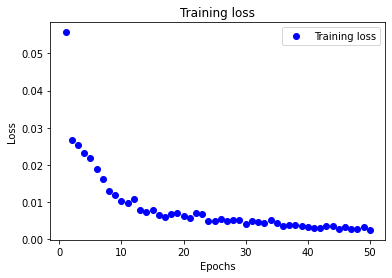

In [179]:
# Plot the training loss
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

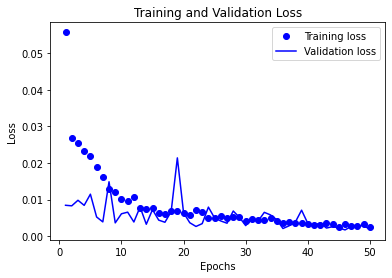

In [180]:
# Plot the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [181]:
# Evaluate the model on the validation data
val_generator = TimeseriesGenerator(val_scaled, val_scaled, length=n_input, batch_size=1)
val_pred = model.predict(val_generator)
val_pred_unscaled = scaler.inverse_transform(val_pred)
val_actual_unscaled = scaler.inverse_transform(val_scaled[-len(val_pred):])

In [182]:
val_pred

array([[0.5791609],
       [0.6339947]], dtype=float32)

In [183]:
val_actual_unscaled = val_actual_unscaled[:len(val.index)]
val_actual_unscaled.shape


(2, 1)

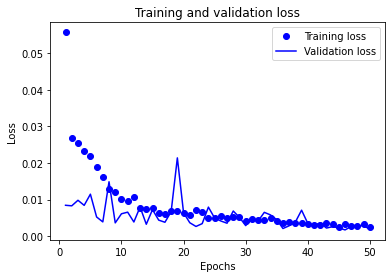

In [184]:
# Plot the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [185]:
val_pred_unscaled.shape
val.index

DatetimeIndex(['1975-01-01', '1975-02-01', '1975-03-01', '1975-04-01',
               '1975-05-01', '1975-06-01', '1975-07-01', '1975-08-01',
               '1975-09-01', '1975-10-01', '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

ValueError: x and y must have same first dimension, but have shapes (12,) and (2, 1)

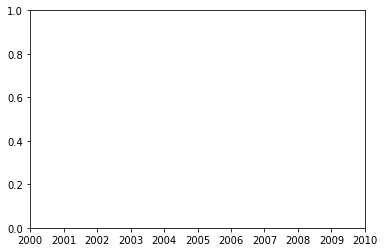

In [186]:
# Plot the predicted and actual values for the validation data
plt.plot(val.index, val_actual_unscaled, label='Actual')
plt.plot(val.index, val_pred_unscaled, label='Predicted')
plt.title('Validation Data')
plt.xlabel('Date')
plt.ylabel('Milk Production')
plt.legend()
plt.show()